<a href="https://colab.research.google.com/github/lucashamon1/Classificacao-de-roupas/blob/main/Classifica%C3%A7%C3%A3o_Roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
import numpy as np

In [2]:
dados = keras.datasets.fashion_mnist

In [3]:
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dados.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
imagens_teste.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

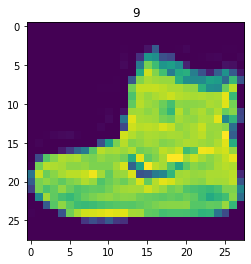

In [7]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [8]:
identificacoes_treino.min()
identificacoes_treino.max()
total_de_classificacoes = 10

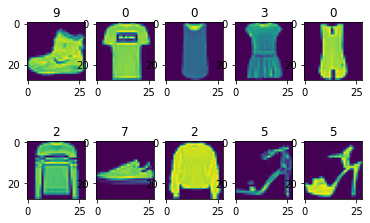

In [9]:
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(identificacoes_treino[imagem])

In [10]:
nomes_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandalia','Camisa', 'Tênis', 'Bolsa', 'Bota']

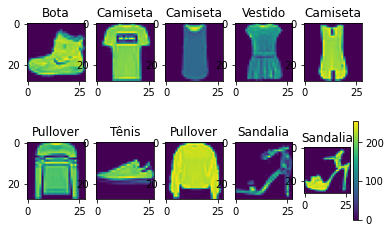

In [11]:
for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
plt.colorbar()

#Criação do Modelo

In [12]:
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)), #camada 0 - camada de entrada
  keras.layers.Dense(256, activation= tensorflow.nn.relu), #camada 1 - camada de processamento
  #256 é um hiperparâmetro
  #relu é uma função não linear de ativação
  keras.layers.Dense(10, activation = tensorflow.nn.softmax) #camada 2 - camada de saida
  #softmax cria probabilidades para cada item pertencer a cada categoria
  ])


#Treino do Modelo

In [13]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [14]:
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 14s 7ms/step - loss: 3.3929


loss do Modelo = 3.3929

#Normalização

In [15]:
#Normalização dos valores de cor
imagens_treino = imagens_treino/float(255)

In [16]:
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.9515


Com a normalização chegamos a uma perda (loss) de 0.9515

#Adicionando Camada Intermediária

In [17]:
modelo2 = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation= tensorflow.nn.relu),
  keras.layers.Dense(128, activation=tensorflow.nn.relu), #camada oculta
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
  ])

In [18]:
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo2.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4761


Ao adicionar uma camada a loss reduziu para 0.4761

In [19]:
modelo3 = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation= tensorflow.nn.relu),
  keras.layers.Dense(128, activation=tensorflow.nn.relu), #camada oculta
  keras.layers.Dense(64, activation=tensorflow.nn.relu), #camada oculta
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
  ])

In [20]:
modelo3.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo3.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4811


Com 2 camadas ocultas o erro aumenta, então o melhor é deixar com apenas 1 camada oculta

O melhor é o modelo 2

#Aumentando o treinamento

In [21]:
modelo2.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3629
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3240
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3019
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2827
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2692


Adicionando mais épocas chegamos a uma loss de 0.2692

#Medindo Acurácia

In [22]:
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo2.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2583 - accuracy: 0.9042
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2431 - accuracy: 0.9085
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2370 - accuracy: 0.9100
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2257 - accuracy: 0.9142
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2209 - accuracy: 0.9165


#Testando o Modelo

In [23]:
testes = modelo2.predict(imagens_teste)

313/313 [==============================] - 1s 2ms/step


#Avaliação do Modelo

In [24]:
modelo2.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 2ms/step - loss: 51.8230 - accuracy: 0.8749


[51.822959899902344, 0.8748999834060669]

A perda está alta e a acurácia baixa

In [25]:
historico = modelo2.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2142 - accuracy: 0.9187 - val_loss: 0.2505 - val_accuracy: 0.9032
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2025 - accuracy: 0.9231 - val_loss: 0.2161 - val_accuracy: 0.9184
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1939 - accuracy: 0.9264 - val_loss: 0.2312 - val_accuracy: 0.9147
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1857 - accuracy: 0.9299 - val_loss: 0.2479 - val_accuracy: 0.9073
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1809 - accuracy: 0.9314 - val_loss: 0.2218 - val_accuracy: 0.9183


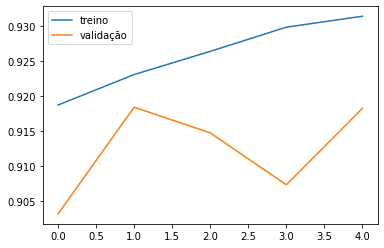

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validação'])

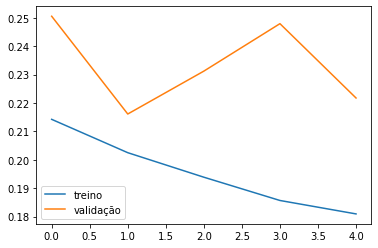

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validação'])

Esta tendo um underfitting

#Refazendo o Treino

In [28]:
historico = modelo2.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1747 - accuracy: 0.9337 - val_loss: 0.2595 - val_accuracy: 0.9061
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1689 - accuracy: 0.9358 - val_loss: 0.2480 - val_accuracy: 0.9097
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1659 - accuracy: 0.9361 - val_loss: 0.2317 - val_accuracy: 0.9162
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1564 - accuracy: 0.9391 - val_loss: 0.2347 - val_accuracy: 0.9140
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1554 - accuracy: 0.9400 - val_loss: 0.2744 - val_accuracy: 0.9045
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1525 - accuracy: 0.9421 - val_loss: 0.2756 - val_accuracy: 0.9089
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1431 - accuracy: 0.9447 - val_loss: 0.2882 - val_accuracy

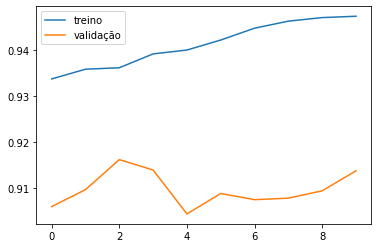

In [29]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validação'])

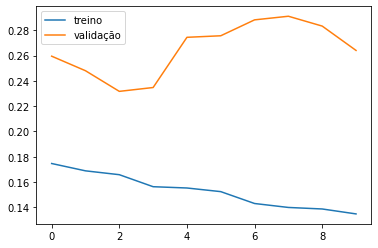

In [30]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validação'])

Pela análise dos gráficos aparentemente o melhor é com 3 épocas

In [42]:
modelo2 = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation= tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(128, activation=tensorflow.nn.relu), #camada oculta
  keras.layers.Dense(10, activation = tensorflow.nn.softmax)
  ])

In [43]:
modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
historico = modelo2.fit(imagens_treino, identificacoes_treino, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5241 - accuracy: 0.8109 - val_loss: 0.3984 - val_accuracy: 0.8544
Epoch 2/3
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4024 - accuracy: 0.8516 - val_loss: 0.4105 - val_accuracy: 0.8504
Epoch 3/3
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3652 - accuracy: 0.8647 - val_loss: 0.3524 - val_accuracy: 0.8696


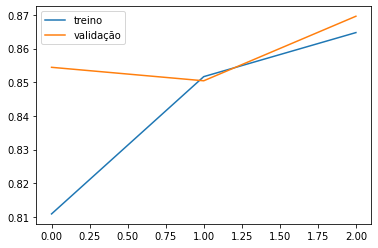

In [45]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validação'])

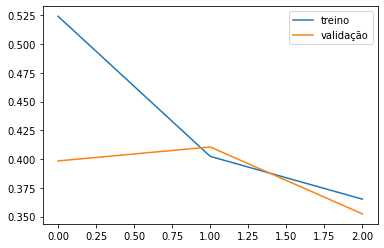

In [46]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validação'])

#Resumo do Modelo

In [47]:
modelo2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [48]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.00044523,  0.06373893,  0.02572864, ...,  0.09111941,
         0.05437513,  0.04851476],
       [ 0.0628121 ,  0.06510317,  0.02639206, ...,  0.08063122,
         0.0008949 ,  0.00938542],
       [ 0.0292517 , -0.09332291, -0.04385323, ...,  0.07999586,
        -0.00367682, -0.06395673],
       ...,
       [ 0.06158839,  0.03508709,  0.06185199, ...,  0.05602338,
        -0.07582753, -0.00274586],
       [ 0.02967913,  0.05181678, -0.05736171, ...,  0.04537251,
         0.05624636,  0.07190224],
       [-0.03039878,  0.06502556,  0.02778625, ...,  0.02844219,
        -0.01815316,  0.05602834]], dtype=float32)

In [49]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 4.78891551e-01,  8.07097435e-01, -1.65142361e-02, -1.89547725e-02,
        1.26117067e-02, -2.65665376e-03, -2.29340419e-02,  5.33695102e-01,
        9.22593474e-01, -4.61947813e-04, -3.00997049e-02,  6.04703277e-03,
        2.85659671e-01, -2.14138851e-02, -1.39358006e-02,  1.06564677e+00,
        7.10433722e-01, -1.52105875e-02,  1.03180301e+00,  9.37937558e-01,
        4.94679540e-01,  6.87993050e-01, -3.00250612e-02, -2.12721657e-02,
        3.80750746e-01,  3.85225683e-01, -2.01964080e-02,  3.11078001e-02,
        5.42637944e-01, -3.61004584e-02,  1.83177412e-01, -1.63158439e-02,
       -1.83693971e-02,  4.00908917e-01, -2.24372856e-02, -1.21302670e-04,
        1.18122649e+00,  6.47947669e-01,  3.99718195e-01, -1.47997111e-01,
        1.65780455e-01,  8.15493584e-01,  3.87734741e-01,  1.20425284e-01,
        9.34010088e-01,  4.22131568e-02,  5.08668758e-02,  5.41407168e-01,
       -1.74640417e-02, -3.47869620e-02, -1.37869176e-02,  4.89252061e-01,
       -2.18809880e-02,  

Os vieses mostram o quão distante o modelo ficou de uma classificação perfeita (na prática funcionam como uma correção)

#Modificando Hiperparâmetros

Adam

In [50]:
adam = keras.optimizers.Adam(lr=0.02)

In [51]:
modelo2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
historico = modelo2.fit(imagens_treino, identificacoes_treino, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8281 - accuracy: 0.7137 - val_loss: 0.6064 - val_accuracy: 0.7874
Epoch 2/3
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7557 - accuracy: 0.7377 - val_loss: 0.6460 - val_accuracy: 0.7918
Epoch 3/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7418 - accuracy: 0.7416 - val_loss: 0.5935 - val_accuracy: 0.7975


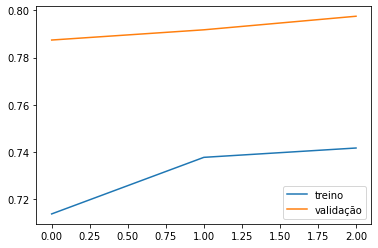

In [53]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validação'])

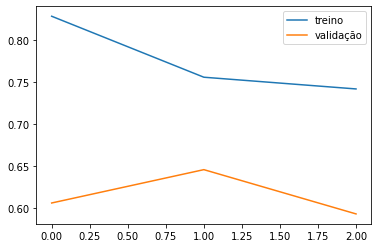

In [54]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validação'])

Batch_size

In [57]:
historico = modelo2.fit(imagens_treino, identificacoes_treino, batch_size=400 ,epochs=3, validation_split=0.2)

Epoch 1/3
120/120 [==============================] - 2s 16ms/step - loss: 0.5084 - accuracy: 0.8190 - val_loss: 0.4508 - val_accuracy: 0.8443
Epoch 2/3
120/120 [==============================] - 2s 15ms/step - loss: 0.4977 - accuracy: 0.8231 - val_loss: 0.4506 - val_accuracy: 0.8467
Epoch 3/3
120/120 [==============================] - 2s 15ms/step - loss: 0.4972 - accuracy: 0.8247 - val_loss: 0.4448 - val_accuracy: 0.8485


In [56]:
parada = [keras.callbacks.EarlyStopping(monitor='val_loss'),
          keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5', monitor='val_loss',
                                          save_best_only=True)]
modelo2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo2.fit(imagens_treino, identificacoes_treino, batch_size=400 ,epochs=3, 
                        validation_split=0.2, callbacks=parada)

Epoch 1/6
120/120 [==============================] - 2s 17ms/step - loss: 0.5394 - accuracy: 0.8040 - val_loss: 0.4899 - val_accuracy: 0.8288
Epoch 2/6
120/120 [==============================] - 2s 15ms/step - loss: 0.5264 - accuracy: 0.8091 - val_loss: 0.4749 - val_accuracy: 0.8336
